In [1]:
import pandas as pd

In [5]:
test=pd.read_excel("bodywash-test .xlsx")

In [6]:
print(test)

                                             Core Item  Level 1 Factors
0    "All of the body washes are excellent and they...              NaN
1                          "Cremo is by far the best!"              NaN
2    "I use the Nivea's during the spring and summe...              NaN
3    "Nivea and Dove. Both are great on my skin. No...              NaN
4    "OG, The one thing that would hold me back fro...              NaN
..                                                 ...              ...
122  What's that smell honey?-That's usually the li...              NaN
123  WOmanLY-Smells like a womans body wash. Way to...              NaN
124  Wonderful stuff, but what's with this price???...              NaN
125  Works better than advertised.-This product wor...              NaN
126  Works great-I like it no testosterone/endocrin...              NaN

[127 rows x 2 columns]


In [7]:
train=pd.read_excel("bodywash-train .xlsx")

In [8]:
print(train)

                                              Core Item     Level 1 Factors
0      31069 we've looked every where for your body ...       Accessibility
1      I love all the scents. I buy all three at onc...           Fragrance
2      I see several in this pic I haven't tried! Go...       Accessibility
3      I'm a big fan of everything honestly. I use t...         Brand Value
4                                 The Best! Hands down          Brand Value
...                                                 ...                 ...
7739  YUM-It has a wonderful woodsy smell. I know, i...           Fragrance
7740  YUM-My man has tried all these flavors now and...  Companion Approval
7741  YUM-My man has tried all these flavors now and...           Fragrance
7742  YUMMY!!!-My nam smells great, what else can I ...  Companion Approval
7743         Zero Scent-The body wash has ZERO scent!\n           Fragrance

[7744 rows x 2 columns]


In [10]:
print(train['Level 1 Factors'].unique())

['Accessibility' 'Fragrance' 'Brand Value' 'Feel / Finish' 'Price'
 'Product Safety' 'Packaging' 'Cleansing' 'Efficacy' 'Product Texture'
 'Skin Care' 'Companion Approval' 'Convenience' 'Brand Accountability'
 'Skin Texture Improvement' 'Brand For Me']


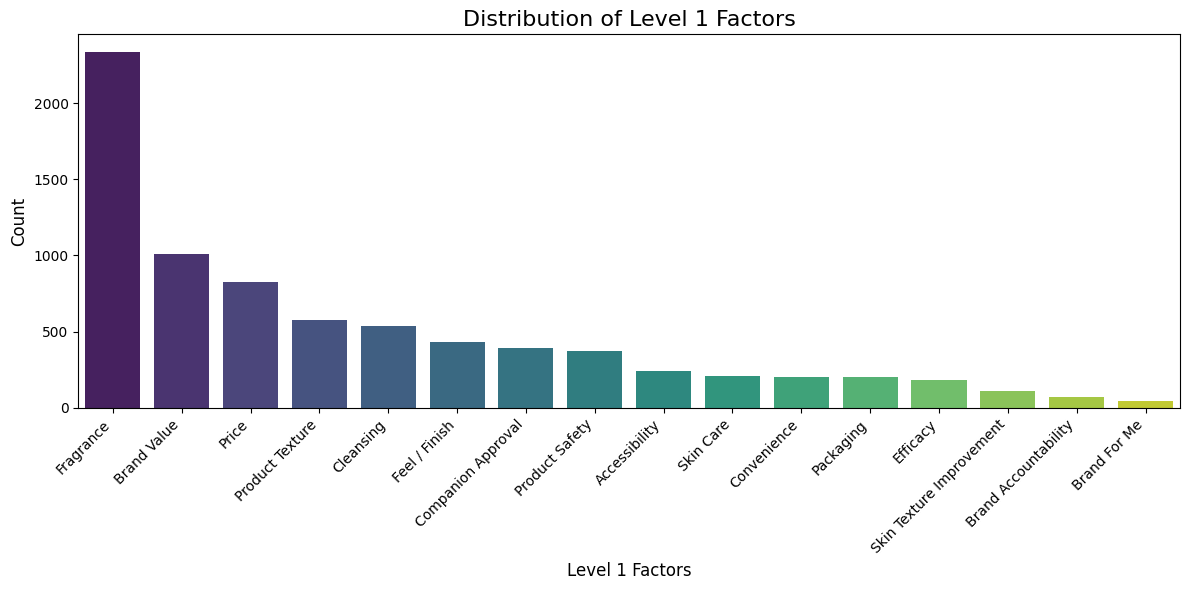

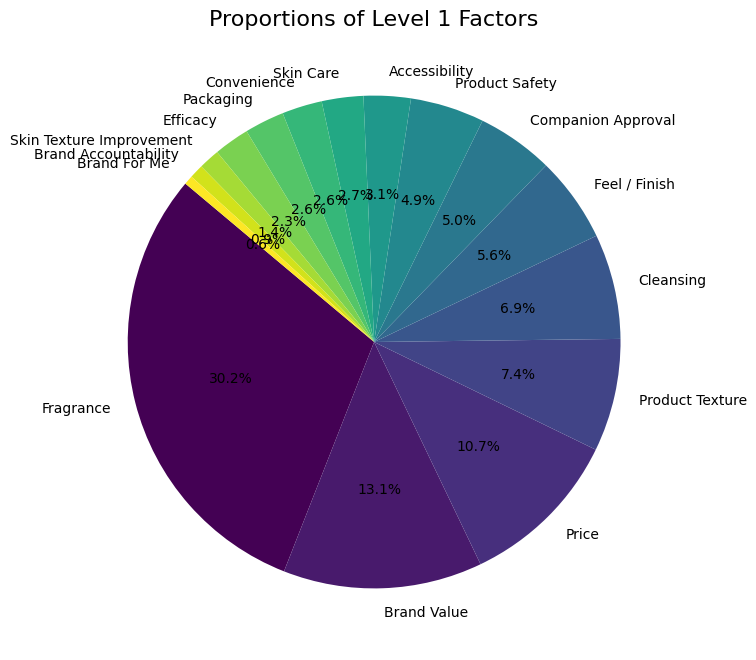

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

test = pd.read_excel("bodywash-train .xlsx")

factor_counts = test['Level 1 Factors'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=factor_counts.index, y=factor_counts.values, palette="viridis")
plt.title("Distribution of Level 1 Factors", fontsize=16)
plt.xlabel("Level 1 Factors", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 8))
factor_counts.plot.pie(
    autopct='%1.1f%%',
    startangle=140,
    cmap='viridis',
    legend=False
)
plt.title("Proportions of Level 1 Factors", fontsize=16)
plt.ylabel("")  
plt.show()

In [24]:
import pandas as pd


df = pd.read_excel("bodywash-train .xlsx")

grouped_df = df.groupby('Core Item')['Level 1 Factors'].apply(list).reset_index()

grouped_df.columns = ['Core Item', 'Level 1 Factors']

print(grouped_df.head())

                                           Core Item  Level 1 Factors
0   31069 we've looked every where for your body ...  [Accessibility]
1   I love all the scents. I buy all three at onc...      [Fragrance]
2   I see several in this pic I haven't tried! Go...  [Accessibility]
3   I'm a big fan of everything honestly. I use t...    [Brand Value]
4                              The Best! Hands down     [Brand Value]


In [25]:
grouped_df

,Core Item,Level 1 Factors
0,31069 we've looked every where for your body ...,[Accessibility]
1,I love all the scents. I buy all three at onc...,[Fragrance]
2,I see several in this pic I haven't tried! Go...,[Accessibility]
3,I'm a big fan of everything honestly. I use t...,[Brand Value]
4,The Best! Hands down,[Brand Value]
...,...,...
3554,â€œQuality productâ€-I've been ordering from ...,"[Brand Value, Fragrance, Price]"
3555,â€œSent a body wash with a broken lid that had...,"[Brand Accountability, Price]"
3556,â€œVery smooth shave--just ask my wifeâ€-I ha...,"[Brand Value, Feel / Finish]"
3557,â€œWorth every cent paid!â€-Have been orderin...,[Brand Value]


In [34]:
all_labels = df['Level 1 Factors'].unique()

mlb = MultiLabelBinarizer(classes=all_labels)
binary_labels = mlb.fit_transform(grouped_df['Level 1 Factors'])

grouped_df['Binary Labels'] = binary_labels.tolist()

print(grouped_df)

                                              Core Item  \
0      31069 we've looked every where for your body ...   
1      I love all the scents. I buy all three at onc...   
2      I see several in this pic I haven't tried! Go...   
3      I'm a big fan of everything honestly. I use t...   
4                                 The Best! Hands down    
...                                                 ...   
3554  â€œQuality productâ€-I've been ordering from ...   
3555  â€œSent a body wash with a broken lid that had...   
3556  â€œVery smooth shave--just ask my wifeâ€-I ha...   
3557  â€œWorth every cent paid!â€-Have been orderin...   
3558  â€œgreat productsâ€-I have never been as sati...   

                      Level 1 Factors  \
0                     [Accessibility]   
1                         [Fragrance]   
2                     [Accessibility]   
3                       [Brand Value]   
4                       [Brand Value]   
...                               ...   
3554

In [27]:
from sklearn.preprocessing import MultiLabelBinarizer

In [29]:
from sklearn.model_selection import train_test_split

sentences = grouped_df['Core Item']
labels = np.array(grouped_df['Binary Labels'].tolist())

# Split into train and test
train_texts, test_texts, train_labels, test_labels = train_test_split(sentences, labels, test_size=0.2, random_state=42)

In [30]:
from transformers import BertTokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

train_encodings = tokenizer(list(train_texts), truncation=True, padding=True, max_length=128)
test_encodings = tokenizer(list(test_texts), truncation=True, padding=True, max_length=128)

import torch

class MultiLabelDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx], dtype=torch.float)
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = MultiLabelDataset(train_encodings, train_labels)
test_dataset = MultiLabelDataset(test_encodings, test_labels)

/Users/karthiksatyanarayana/anaconda3/lib/python3.11/site-packages/huggingface_hub/file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
loading file vocab.txt from cache at /Users/karthiksatyanarayana/.cache/huggingface/hub/models--bert-base-uncased/snapshots/86b5e0934494bd15c9632b12f734a8a67f723594/vocab.txt
loading file added_tokens.json from cache at None
loading file special_tokens_map.json from cache at None
loading file tokenizer_config.json from cache at /Users/karthiksatyanarayana/.cache/huggingface/hub/models--bert-base-uncased/snapshots/86b5e0934494bd15c9632b12f734a8a67f723594/tokenizer_config.json
loading configuration file config.json from cache at /Users/karthiksatyanarayana/.cache/huggingface/hub/models--bert-base-uncased/snapshots/86b5e0934494bd15c9632b12f734a8a67f723594/config.json
Model config Ber

In [31]:
from transformers import BertForSequenceClassification, Trainer, TrainingArguments

model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=len(all_labels), problem_type="multi_label_classification")

training_args = TrainingArguments(
    output_dir='./results',
    evaluation_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=5,
    weight_decay=0.01,
    logging_dir='./logs',
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset
)

trainer.train()

loading configuration file config.json from cache at /Users/karthiksatyanarayana/.cache/huggingface/hub/models--bert-base-uncased/snapshots/86b5e0934494bd15c9632b12f734a8a67f723594/config.json
Model config BertConfig {
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2",
    "3": "LABEL_3",
    "4": "LABEL_4",
    "5": "LABEL_5",
    "6": "LABEL_6",
    "7": "LABEL_7",
    "8": "LABEL_8",
    "9": "LABEL_9",
    "10": "LABEL_10",
    "11": "LABEL_11",
    "12": "LABEL_12",
    "13": "LABEL_13",
    "14": "LABEL_14",
    "15": "LABEL_15"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1,
    "LABEL_10": 10,
    "LABEL_11": 11,
    "LABEL_12": 12,
    "LABEL_13": 13,
    "LABEL_

Epoch,Training Loss,Validation Loss
1,No log,0.252946
2,0.302900,0.205085
3,0.198900,0.182651
4,0.198900,0.173226
5,0.156600,0.170531


***** Running Evaluation *****
  Num examples = 712
  Batch size = 8
Saving model checkpoint to ./results/checkpoint-500
Configuration saved in ./results/checkpoint-500/config.json
Model weights saved in ./results/checkpoint-500/pytorch_model.bin
***** Running Evaluation *****
  Num examples = 712
  Batch size = 8
Saving model checkpoint to ./results/checkpoint-1000
Configuration saved in ./results/checkpoint-1000/config.json
Model weights saved in ./results/checkpoint-1000/pytorch_model.bin
***** Running Evaluation *****
  Num examples = 712
  Batch size = 8
***** Running Evaluation *****
  Num examples = 712
  Batch size = 8
Saving model checkpoint to ./results/checkpoint-1500
Configuration saved in ./results/checkpoint-1500/config.json
Model weights saved in ./results/checkpoint-1500/pytorch_model.bin
***** Running Evaluation *****
  Num examples = 712
  Batch size = 8


Training completed. Do not forget to share your model on huggingface.co/models =)




TrainOutput(global_step=1780, training_loss=0.20723263172621137, metrics={'train_runtime': 5746.7722, 'train_samples_per_second': 2.477, 'train_steps_per_second': 0.31, 'total_flos': 936464167342080.0, 'train_loss': 0.20723263172621137, 'epoch': 5.0})

In [32]:
predictions = trainer.predict(test_dataset)
predicted_logits = predictions.predictions
predicted_probs = torch.sigmoid(torch.tensor(predicted_logits)).numpy()

predicted_labels = (predicted_probs > 0.5).astype(int)

from sklearn.metrics import classification_report

print(classification_report(test_labels, predicted_labels, target_names=all_labels))

***** Running Prediction *****
  Num examples = 712
  Batch size = 8


                          precision    recall  f1-score   support

           Accessibility       0.86      0.55      0.67        44
               Fragrance       0.91      0.93      0.92       452
             Brand Value       0.76      0.60      0.67       203
           Feel / Finish       0.78      0.65      0.71        81
                   Price       0.87      0.84      0.85       164
          Product Safety       0.67      0.30      0.41        67
               Packaging       0.00      0.00      0.00        42
               Cleansing       0.92      0.85      0.88       105
                Efficacy       0.00      0.00      0.00        36
         Product Texture       0.91      0.86      0.89        99
               Skin Care       0.82      0.22      0.35        41
      Companion Approval       0.75      0.75      0.75        76
             Convenience       0.00      0.00      0.00        42
    Brand Accountability       0.00      0.00      0.00        11
Skin Text

/Users/karthiksatyanarayana/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/karthiksatyanarayana/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [35]:
import pandas as pd

test_df = pd.read_excel("bodywash-test .xlsx")

test_sentences = test_df['Core Item'].tolist()
test_encodings = tokenizer(test_sentences, truncation=True, padding=True, max_length=128, return_tensors="pt")

test_encodings = {key: val.to(device) for key, val in test_encodings.items()}

model.eval()
with torch.no_grad():
    logits = model(**test_encodings).logits
    probabilities = torch.sigmoid(logits).cpu().numpy()

threshold = 0.5
predicted_labels = (probabilities >= threshold).astype(int)

predicted_label_lists = []
for preds in predicted_labels:
    predicted_label_lists.append([mlb.classes_[i] for i, val in enumerate(preds) if val == 1])

test_df['Predicted Labels'] = predicted_label_lists

output_rows = []
for index, row in test_df.iterrows():
    for label in row['Predicted Labels']:
        output_rows.append({'Core Item': row['Core Item'], 'Predicted Label': label})

output_df = pd.DataFrame(output_rows)

output_file = "predicted_labels.xlsx"
output_df.to_excel(output_file, index=False)
print(f"Predicted labels saved to {output_file}")

Predicted labels saved to predicted_labels.xlsx
